# Plotting Data with Two Dimensions

There are many data sets where results are a function of more than one variable which we might want to plot in a different way. This notebook looks at some of those plot types.

## Creating a 3D plot

First, we need to create a figure by writing ```fig = plt.figure()```. This will create a new figure ans save a reference to it into the ```fig``` variable. Next, we can create a new set of axes using the command ```ax = plt.axes(projection="3d")```. The argument ```projection``` allows us to tells Matplotlib to create a 3D set of axes in the current figure. Note that, in some versions of Matplotlib, you may need to also import ```mplot3d``` from ```mpl_toolkits``` for the 3D proejction to work.

In previous examples, the handling of figures and axes was done automatically. Now, how, we need to get some finer control over what's going on, so we need to handle the creation of the figure and axes manually. Saving a reference to the current figure and axes isn't strictly required for what we've done here but, by creating a reference to them in ```fig``` and ```ax```, we open up the possibility to access them again later. This usage pattern for figures and axes is very common in Matplotlib.

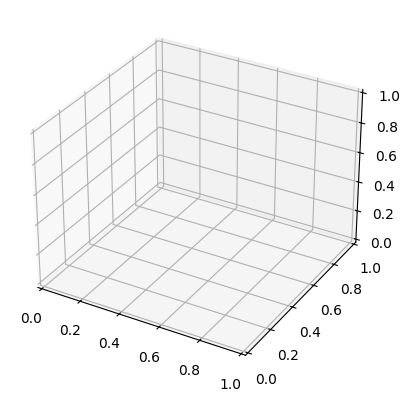

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Create a new figure
fig = plt.figure()
#Create a new set of axes in the figure and specify it should have a 3D projection
ax = plt.axes(projection='3d')

## 3D Scatter

To create a 3D scatter plot, we first need to get the figures and axes. We can use these references to set the names of the axes. For instance ```ax.set_zlabel("z")``` labels the z-axis "z". Note that the command ```plt.zlabel("z")``` wouldn't work here as you might expect. This is because ```zlabel``` isn't a part of the ```pyplot``` module (unlike ```xlabel``` and ```ylabel```). Instead, we can access the ```set_zlabel``` method of the reference to the axes.

We can use ```ax.set_xlim(-2, 11)``` to set the range of the x-dimension which will be displayed on the graph to the range between -2 and 11. This is necessary as, without this, the lower boundary of the x dimension would occur at $x=0$. This command and ones like it, can be useful for controlling the limits of the axes in a number of situations.

TWith default options, the axes titles of a 3D plot can be outside the bounds of the image. The command ```ax.set_box_aspect(aspect=None, zoom = 0.85)``` zooms out the camera a little to ensure the axes titles are visible. The default value for ```zoom``` is 1.0, with smaller values zooming out and larger values zooming in.

We can scatter points on the axes by using the ```scatter3D``` method of the reference to the current axes. The first three arguments describe the x, y and z locations of the points respectively.

By setting the optional ```cmap``` argument to ```"Blues"``` we chose to use a blue color palette. More information on colour maps can be found [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html). We can then chose to colour the points according their height in the z-axis by setting the optional argument ```c=zdata```. This means points low on the plot will be transparent and points near the top will be dark, opaque and blue. This can help to give some indication to a viewer about the height of the points and thus, help them to interpret the 3D image.

This means, however, some points will be nearly invisible. We can make them more visible by giving them a visible outline. We can do this by setting the optional argument ```edgecolors="black"```.



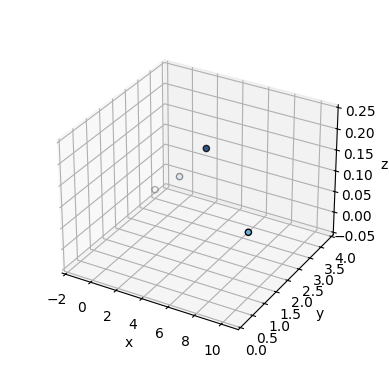

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Create a new figure
fig = plt.figure()
#Create a new set of axes in the figure and specify it should have a 3D projection
ax = plt.axes(projection='3d')

# Define the data for four points
xdata = [-1, 10, 5, 1]
ydata = [3, 1, 2, 3]
zdata = [0.0, 0.1, 0.2, 0.05]

# Set the labels for the axes
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Set the limits of the x, y and z axes
ax.set_xlim(-2, 11) # x ranges from -2 to 11
ax.set_ylim(0, 4) # y ranges from 0 to 4
ax.set_zlim(-0.05, 0.25) # z ranges from -0.05 to 0.25

# Without this command, some of the axis labels would be cut off. This command makes the figure fit properly in its frame
ax.set_box_aspect(aspect=None, zoom = 0.85)
#ah zooming to fit everything in otherwise zooms out of your vision

# Plot the scattered points
# By setting cmap to Blues we tell matplotlib to use a blue colour palette for the points
# We can tell matplotlib to colour the data according to the zdata
# This means points with a lower z value will be near transparent and points with high z will be a solid dark blue
# Setting the edgecolors to black creates an outline for the points
ax.scatter3D(xdata, ydata, zdata, cmap="Blues", c=zdata, edgecolors="black") #cmap=scales of blues, matplot lib 
#will look at the z data and pick colours in scale, this helps with depth perception
#egde colors to draw a line arund otherwise the white dot on a white background is rubbish. 

## 3D Line

Creating a 3D line plot is very similar. We can use the ```3Dplot``` method of the axes to plot a series of points via sequences describing the x, y and z coordinates.

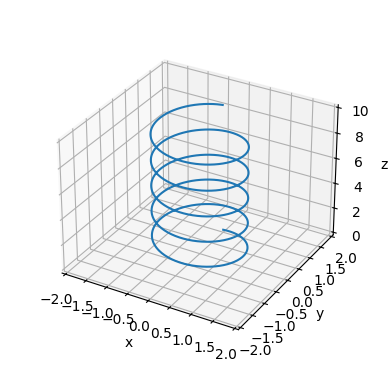

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math

# Create a new figure
fig = plt.figure()
#Create a new set of axes in the figure and specify it should have a 3D projection
ax = plt.axes(projection='3d')

# Define the data for line
xdata = []
ydata = []
zdata = []
for i in range(1000):
  xdata.append(math.sin(i * math.pi /100))
  ydata.append(math.cos(i * math.pi / 100))
  zdata.append(i / 100)

# Set the labels for the axes
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Set the limits of the x, y and z axes
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(0, 10)

# Fit the figure to its frame
ax.set_box_aspect(aspect=None, zoom = 0.85)

# Plot the line
ax.plot3D(xdata, ydata, zdata)

## Contour Plots

Sometimes, you might want to plot one variable as a function of two others. Matplotlib offers a few options for this. In this example, we'll look at the contour plot. This plot draws a number of contour lines in 3D space with their elevation representing the value of the dependent variable. This is achieved using the command ```ax.contour3D```.

The data is provided on a Cartesian grid. The first two arguments give the x and y coordinates of this grid. The next is a sequence of sequences (or a 2D Numpy array) which contains the values of the dependent variable. The values must correspond to the points of the Cartesian grid. So, for a 5x5 grid (like in the example below) this might a list of containing 5 lists, each containing 5 values. Each of the inner lists represents the values along a particular line of constant y. This sequence of sequences should be provided as the third argument to ```ax.contour3D```.

The next argument is an integer which specifies the number of contour lines to be included. These contours will be evenly spaced across the range of the values. They will also be coloured, with the colour of the contours modifiable through the ```cmap``` optional argument.

In the example below, we also use the ```ax.view_init``` command to set the location of the camera viewing the 3D space. The first argument is the elevation in degrees, the second is the azimuthal- coordinate in degrees.

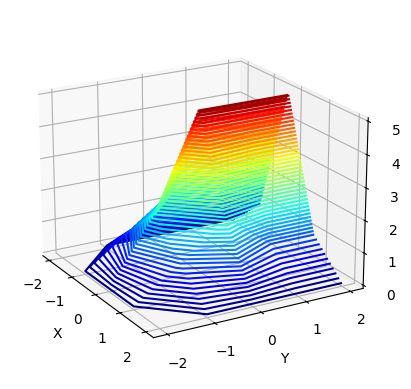

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Specify the coordinates of the grids of the axes in the x and y dimension
x = [-2, -1, 0, 1, 2]
y = [-2, -1, 0, 1, 2]

# Create the set of values
# Each inner list refers to the values are various values of y at a constant x
values = [[0, 0, 0, 0, 0], [0, 1, 2, 1, 0], [0, 2, 5, 2, 0], [0, 1, 5, 1, 0], [0, 1, 5, 1, 0]]

# Create the figure and axes
fig = plt.figure()
ax = plt.axes(projection='3d')

# Set the x and y axis labels
ax.set_xlabel("X")
ax.set_ylabel("Y")

# Set the elevation and the azimuthal angle of the camera
ax.view_init(20, -30)

# Create the contour plot
# The first two arguments describe the x and y coordinates
# The third describes the values at the intersections
# The fourth determines the number of contours
# The cmap optional argument sets the colour map
ax.contour3D(x, y, values, 50, cmap="jet")

## Heat Map

It's also possible to plot this data as a 2D dimensional heatmap using the ```ax.imshow``` command ([manual page](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)). We'll use the same data as the last example.

The only required argument is the set of values. In this example, we'll also define the "extent" of the data. This is a series of 4 values which describes the lowest extent in the x-dimension, the highest extent in the x-dimension, the lowest extent in the y-dimension and the highest extent in the y-dimension respectively.

When we create the ```imshow```, we also create a reference to it in the variable ```im``` by saving the value returned by the ```ax.imshow``` command. This can be passed to the ```plt.colorbar``` command ([manual page](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html)) to create a colour key next to the main image.

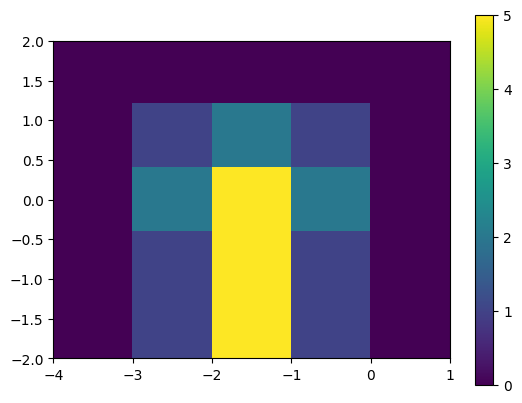

In [7]:
import matplotlib.pyplot as plt

# Create the set of values
# Each inner list refers to the values are various values of x at a constant y
values = [[0, 0, 0, 0, 0], [0, 1, 2, 1, 0], [0, 2, 5, 2, 0], [0, 1, 5, 1, 0], [0, 1, 5, 1, 0]]

# Create the figure and axes
fig = plt.figure()
ax = plt.axes()
#figure is the overall image
#axis is the axes innit 

# Define the axes
# The values are the lower extent of x, the upper extent of x, the lower extent of y and the upper extent of y
extent = [-4, 1, -2, 2]

# Create an imshow
# Pass the values to give the values at different points
# Provide the extent so the values lie on the correct points
# Also save the reference to the imshow into the variable "im"
im = ax.imshow(values, extent=extent)
# Add a colorbar to the figure
# Pass "im" as an argument so the values and colours  from the imshow can be used
plt.colorbar(im)

## Exercise: Gravity Wells

In astronomy, the effect of gravity on an region is sometimes visualised as a sheet which is deformed by a presence of massive bodies such as stars. Planets can be visualised as moving around the curved space surrounding the star, such as in the image below.

<center><img src='resources/gravity_spacetime.png' width = 500/>
<figcaption>Space-time being bent by a star, and an orbiting planet</figcaption></center>
</figure>

In this exercise, use the tools introduced in this notebook to produce a plot which includes:

* a representation of the deformed space-time using ```contour3D```
* the orbital path of a planet using ```plot3D```
* the locations of the star and planet using ```scatter3D```.

In the cell below, code to generate much of the necessary data has already been created. Complete the cell so the various components of the plot are added. Once you have a basic representation, use your own judgment to chose options make the image look as clear, informative and attractive.

The variables which contain the data generated in the provided code are as follows:

| Variable | Content |
|-|-|
| ```x_well``` | A list containing the x-coordinates of the grid for the gravitational well |
| ```y_well``` | A list containing the y-coordinates of the grid for the gravitational well |
| ```values_well``` | A list of lists containing the depth of the gravitational well at the grid point intersections |
| ```x_orbit``` | A list of the x-coordinates of positions on the planets orbit |
| ```y_orbit``` | A list of the y-coordinates of positions on the planets orbit |
| ```z_orbit``` | A list of the z-coordinates of positions on the planets orbit |

In addition, the star is found at $x=0$, $y=0$ and the planet orbits the star at a distance of 5 (e.g. it might be found at $x=5$, $y=0$). It is recommended that the star, planet and planet's orbit are represented on the plane $z=0.5$ so they are visibly above the gravity well.

In [6]:
import math

# Create the coordinates and values for the gravity well
x_well = []
y_well = []
for i in range(21):
  x_well.append(-10 + i)
  y_well.append(-10 + i)

values_well = []

for ix in range(21):
  values_well.append([])
  for iy in range(21):
    if x_well[ix] == 0 and y_well[iy] == 0:
      value = - 1
    else:
      value = - 1 / (x_well[ix] ** 2 + y_well[iy] ** 2)
    values_well[ix].append(value)

# Create the coordinates for the planet's orbit
x_orbit = []
y_orbit = []
z_orbit = []

for i in range(101):
  x_orbit.append(5 * math.cos(i * math.pi / 50))
  y_orbit.append(5 * math.sin(i * math.pi / 50))
  z_orbit.append(0.5)

# Write your code to plot the elements of the figure below








